# THE SPARK FOUNDATION

# TASK NO 2

# CLUSTERING OF IRIS DATA 

# Submitted by MUHAMMAD RAFAY

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [43]:
iris_records=pd.read_csv(r"E:/spark foundation internship/Iris.csv")

In [45]:
iris_records_target=iris_records.iloc[:,-1:]


In [41]:
iris_records=iris_records.iloc[ :,1:-1]

#### As this is unsupervised learning thats why we remove the output target feature in order to make clusters

In [7]:
iris_records.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### number of rows and columns

In [8]:
rows,columns=iris_records.shape

In [9]:
print("Total No of Rows :{}".format(rows),"Total No of Columns :{}".format(columns))

Total No of Rows :150 Total No of Columns :4


#### in order to make clusters we represent this dataframe in the form of numpy array

In [12]:
input_features=iris_records.iloc[:,[0,1,2,3]].values

print(input_features)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

#### to find the optimum number of cluster we initialize a cluster with random values then we draw the elbow diagram to find optimum one

##### we find the wcss value by taking the different values of clusters in a loop and we choos whose value of k which is most optimum shown on the graph

##### we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow.

In [19]:
wcss = [] #wcss is with in cluster sum of square
kvalues=[]

for i in range(1,11) :
    kmeans=KMeans(n_clusters = i,init = 'k-means++',max_iter = 300, n_init = 10,random_state = 0)
    kmeans.fit(input_features)
    wcss.append(kmeans.inertia_)
    kvalues.append(i)
    


### Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are) 

In [18]:
print(wcss)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.93873974358975, 34.190687924796634, 29.90537429982511, 27.927882157034986, 25.955497086247092]


### know we draw the diagram to decide which k value is optimum to group the clusters

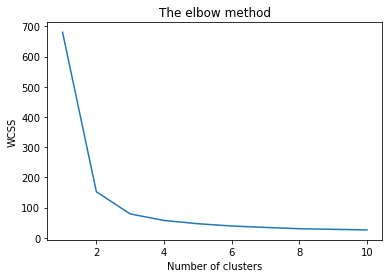

In [23]:
plt.plot(kvalues,wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


### here we can seen the 3rd values is shown as the optimum one in the cluster

### y_kmeans contains the grouping cluster in the data set

In [24]:
kmeans=KMeans(n_clusters = 3,init = 'k-means++',max_iter = 300, n_init = 10,random_state = 0)
y_kmeans=kmeans.fit_predict(input_features) 


In [52]:
values_target=list(iris_records_target.Species.unique())

### these are the target features



In [54]:
print(values_target)

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


### know we can show clusters visually

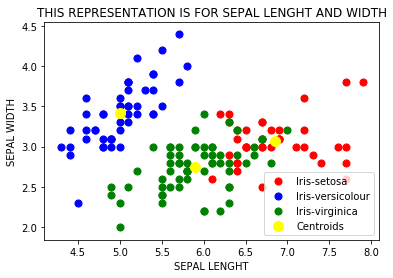

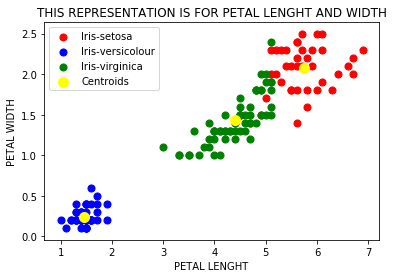

In [82]:

plt.scatter(input_features[y_kmeans == 0, 0], input_features[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(input_features[y_kmeans == 1, 0], input_features[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(input_features[y_kmeans == 2, 0],input_features[y_kmeans == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')
plt.legend()

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.title('THIS REPRESENTATION IS FOR SEPAL LENGHT AND WIDTH')
plt.xlabel('SEPAL LENGHT')
plt.ylabel('SEPAL WIDTH') # Within cluster sum of squares

plt.show()

plt.scatter(input_features[y_kmeans == 0, 2], input_features[y_kmeans == 0, 3], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(input_features[y_kmeans == 1, 2], input_features[y_kmeans == 1, 3], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(input_features[y_kmeans == 2, 2],input_features[y_kmeans == 2, 3],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.title('THIS REPRESENTATION IS FOR PETAL LENGHT AND WIDTH')
plt.xlabel('PETAL LENGHT')
plt.ylabel('PETAL WIDTH') # Within cluster sum of squares

plt.show()

